<a href="https://colab.research.google.com/github/Godfred-oops/E_levy_Sentiment_Analysis/blob/main/E_levy_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving logins.csv to logins.csv


In [ ]:
login = pd.read_csv('logins.csv') 

In [ ]:
login.columns = ["API_keys", "API_key_Secret", "Access_token", "Access_Token_Secret"]

In [ ]:
Consumerkeys = login["API_keys"][0]
ConsumerSecretKeys = login["API_key_Secret"][0]
AccessToken = login["Access_token"][0]
AccessTokenSecret = login["Access_Token_Secret"][0]

In [ ]:
#create authentication object 
authenticate = tweepy.OAuthHandler(Consumerkeys, ConsumerSecretKeys)

In [ ]:
# set access token and token secret 
authenticate.set_access_token(AccessToken, AccessTokenSecret)

In [ ]:
#create API object while passing in the auth information 
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#create a datframe for the tweets 
all_tweets = [[tweet.full_text, tweet.created_at,  tweet.author.location, tweet.author.screen_name, 
               tweet.favorite_count, tweet.entities.get('hashtags'), 
               tweet.retweet_count, tweet.author.followers_count ] for tweet in tweepy.Cursor(api.search,
                                                                                                          q=["#E-levy", "E-levy"], 
                                                                                                          count = 10000, 
                                                                                                          lang = "en",
                                                                                                          since = "2022-01-01",
                                                                                                          max_id = -1, 
                                                                                                          tweet_mode = "extended").items()]

cols = ['tweets', 'Time', 'Location', 'Twitter_handle', 'Likes', 'hashtag', 'retweets', 'followers']

df = pd.DataFrame(all_tweets, columns = cols)
df.sample(5)

,tweets,Time,Location,Twitter_handle,Likes,hashtag,retweets,followers
1348,@selorm_tronou *Protestors gather to kickstart...,2022-02-10 11:51:20,www.omankse3bo.xyz,MilanoDeBlogger,0,[],0,12029
3020,RT @tv3_ghana: E-levy: If slapping Deputy Spea...,2022-02-07 06:56:49,Ghana,Mysticalgee2,0,"[{'text': 'TV3NewDay', 'indices': [105, 115]}]",6,2015
1759,“You’re insensitive” – Sam George fights Annoh...,2022-02-10 03:45:53,Achimota,Ghananewss,1,[],0,1252
1597,Demonstration against E-Levy to be held today ...,2022-02-10 08:41:35,"Accra, Ghana",independent_gh,0,[],0,604
672,RT @news_ghana: Ghanaian Minister urges public...,2022-02-11 09:29:08,Accra,mideasltd,0,"[{'text': 'Headlines', 'indices': [91, 101]}, ...",2,929


In [ ]:
df.to_csv('E_levy_data.csv', index = False)

In [ ]:
# Clean tweets from '@', '#', RT[] and hyperlink 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)  #removing the '@' from the data
  text = re.sub(r'#', '',text)     #removing the '#'
  text = re.sub(r'RT[\s]', '',text) #removing 'RT'
  text = re.sub(r'https?:/\/\S+', '',text)  #removing the hyperlinks 

  return text 

df['tweets'] = df['tweets'].apply(cleanTxt)


In [ ]:
df[0:10]

,tweets,Time,Location,Twitter_handle,Likes,hashtag,retweets,followers
0,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 14:44:14,"Accra, Ghana",eatoarthur,0,[],6,328
1,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:29:36,,NsiaYaw2,0,[],6,1450
2,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:27:49,,CrucialClus_2c,0,[],6,1239
3,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:20:32,"Suame-Kumasi , Ghana",kwamekyeibafour,0,[],6,2256
4,: OccupyGhana outlines three conditions for pa...,2022-02-14 13:09:12,"Accra, Ghana",AlloteyGodwin,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,2837
5,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:58:51,,newlove_eney,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1633
6,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:55:20,"Greater Accra, Ghana",Akuabettys,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1043
7,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:48:27,"Accra, Ghana",YawLejeune,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,363
8,OccupyGhana outlines three conditions for pass...,2022-02-14 12:48:12,"Accra, Ghana",Citi973,7,"[{'text': 'CitiNewsroom', 'indices': [97, 110]}]",5,1459607
9,Gov't spending so much money on E-Levy Town Ha...,2022-02-14 12:43:56,"Accra, Ghana",primenewsghana,0,[],0,545


In [ ]:
#create the subjectivity of the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

#create the polarity of the tweets 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# adding new columns to the dataframe named polarity and subjectivity 
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)



In [ ]:
df[0:10]

,tweets,Time,Location,Twitter_handle,Likes,hashtag,retweets,followers,Subjectivity,Polarity
0,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 14:44:14,"Accra, Ghana",eatoarthur,0,[],6,328,0.4,0.8
1,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:29:36,,NsiaYaw2,0,[],6,1450,0.4,0.8
2,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:27:49,,CrucialClus_2c,0,[],6,1239,0.4,0.8
3,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:20:32,"Suame-Kumasi , Ghana",kwamekyeibafour,0,[],6,2256,0.4,0.8
4,: OccupyGhana outlines three conditions for pa...,2022-02-14 13:09:12,"Accra, Ghana",AlloteyGodwin,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,2837,0.5,0.5
5,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:58:51,,newlove_eney,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1633,0.5,0.5
6,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:55:20,"Greater Accra, Ghana",Akuabettys,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1043,0.5,0.5
7,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:48:27,"Accra, Ghana",YawLejeune,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,363,0.5,0.5
8,OccupyGhana outlines three conditions for pass...,2022-02-14 12:48:12,"Accra, Ghana",Citi973,7,"[{'text': 'CitiNewsroom', 'indices': [97, 110]}]",5,1459607,0.5,0.5
9,Gov't spending so much money on E-Levy Town Ha...,2022-02-14 12:43:56,"Accra, Ghana",primenewsghana,0,[],0,545,0.2,0.2


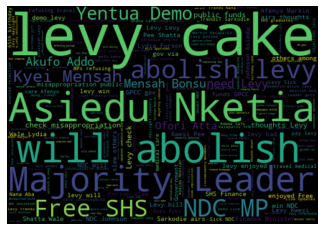

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualise the words in the tweet using wordCloud 
words = ' '.join([tweets for tweets in df['tweets']])
wordcloud = WordCloud(width = 500, height = 350, random_state = 42, max_font_size= 100).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')
files.download('wordcloud.png')

In [ ]:
df['Time']

0      2022-02-14 14:44:14
1      2022-02-14 13:29:36
2      2022-02-14 13:27:49
3      2022-02-14 13:20:32
4      2022-02-14 13:09:12
               ...        
3119   2022-02-06 07:09:14
3120   2022-02-06 07:06:18
3121   2022-02-06 06:51:04
3122   2022-02-06 06:27:32
3123   2022-02-06 05:50:10
Name: Time, Length: 3124, dtype: datetime64[ns]

In [ ]:
# Dataframe of the likes and retweets of the tweeps since September 01,2021
totals = [df["Likes"].value_counts(), df["retweets"].value_counts()]
df_like_RT = pd.DataFrame(totals)
df_like_RT.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,67,69,70,71,72,73,76,79,81,82,83,84,89,90,92,99,103,106,107,109,111,113,121,138,166,175,178,180,214,222,226,248,255,329,392,549,699,1192,1463
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.0,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.0,2.000000,1.0,2.000000,2.000000,1.0,2.00000,1.0,2.00000,2.000000,2.000000,1.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1796.000000,254.500000,114.500000,95.500000,64.000000,57.00000,46.500000,50.500000,38.000000,25.000000,34.500000,17.000000,8.0,13.500000,11.0,18.000000,9.0,9.500000,14.500000,4.500000,13.000000,2.500000,11.500000,20.500000,5.0,4.0,14.000000,2.0,13.000000,12.500000,1.0,16.50000,4.0,15.00000,7.000000,18.500000,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,30.5000,1.0,81.0,87.0,1.0,1.0,1.0,98.0,1.0,86.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
std,807.515944,6.363961,43.133514,48.790368,42.426407,39.59798,28.991378,47.376154,28.284271,5.656854,31.819805,2.828427,NaN,0.707107,0.0,14.142136,NaN,7.778175,6.363961,0.707107,7.071068,0.707107,12.020815,26.162951,NaN,NaN,14.142136,NaN,16.970563,14.849242,NaN,21.92031,NaN,19.79899,8.485281,24.748737,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1225.000000,250.000000,84.000000,61.000000,34.000000,29.00000,26.000000,17.000000,18.000000,21.000000,12.000000,15.000000,8.0,13.000000,11.0,8.000000,9.0,4.000000,10.000000,4.000000,8.000000,2.000000,3.000000,2.000000,5.0,4.0,4.000000,2.0,1.000000,2.000000,1.0,1.00000,4.0,1.00000,1.000000,1.000000,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0000,1.0,81.0,87.0,1.0,1.0,1.0,98.0,1.0,86.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
25%,1510.500000,252.250000,99.250000,78.250000,49.000000,43.00000,36.250000,33.750000,28.000000,23.000000,23.250000,16.000000,8.0,13.250000,11.0,13.000000,9.0,6.750000,12.250000,4.250000,10.500000,2.250000,7.250000,11.250000,5.0,4.0,9.000000,2.0,7.000000,7.250000,1.0,8.75000,4.0,8.00000,4.000000,9.750000,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,15.7500,1.0,81.0,87.0,1.0,1.0,1.0,98.0,1.0,86.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
50%,1796.000000,254.500000,114.500000,95.500000,64.000000,57.00000,46.500000,50.500000,38.000000,25.000000,34.500000,17.000000,8.0,13.500000,11.0,18.000000,9.0,9.500000,14.500000,4.500000,13.000000,2.500000,11.500000,20.500000,5.0,4.0,14.000000,2.0,13.000000,12.500000,1.0,16.50000,4.0,15.00000,7.000000,18.500000,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,30.5000,1.0,81.0,87.0,1.0,1.0,1.0,98.0,1.0,86.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
75%,2081.500000,256.750000,129.750000,112.750000,79.000000,71.00000,56.750000,67.250000,48.000000,27.000000,45.750000,18.000000,8.0,13.750000,11.0,23.000000,9.0,12.250000,16.750000,4.750000,15.500000,2.750000,15.750000,29.750000,5.0,4.0,19.000000,2.0,19.000000,17.750000,1.0,24.25000,4.0,22.00000,10.000000,27.250000,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,45.2500,1.0,81.0,87.0,1.0,1.0,1.0,98.0,1.0,86.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
max,2367.000000,259.000000,145.000000,130.000000,94.000000,85.00000,67.000000,84.000000,58.000000,29.000000,57.000000,19.000000,8.0,14.000000,11.0,28.000000,9.0,15.000000,19.000000,5.000000,18.000000,3.000000,20.000000,39.000000,5.0,4.0,24.000000,2.0,25.000000,23.000000,1.0,32.00000,4.0,

In [ ]:
df['Twitter_handle'].values

array(['eatoarthur', 'NsiaYaw2', 'CrucialClus_2c', ..., 'DonOseiShaker',
       '__Kekels_', 'yinpasiya_'], dtype=object)

In [ ]:
# dataframe for the twitter handles, the number of times the person have tweeted or retweeted
df_handle = pd.DataFrame(df['Twitter_handle'].value_counts())
df_handle.describe()

,Twitter_handle
count,1333.000000
mean,2.343586
std,4.951919
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,79.000000


In [ ]:
# visualising the number of tweeps tweeting about the E-levy
plt.figure(figsize = (50,800))
df["Twitter_handle"].value_counts().plot(kind = 'barh')
plt.title('People and the number of times they are tweeting about the E-levy')
plt.ylabel('Tweeps')
plt.xlabel('Number of times the person is tweeting about the E-levy')
plt.savefig('Tweeps.png')
files.download('Tweeps.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#create the state of the polarity with positive, neutral and neutral 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [ ]:
df[0:10]

,tweets,Time,Location,Twitter_handle,Likes,hashtag,retweets,followers,Subjectivity,Polarity,Analysis
0,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 14:44:14,"Accra, Ghana",eatoarthur,0,[],6,328,0.4,0.8,Positive
1,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:29:36,,NsiaYaw2,0,[],6,1450,0.4,0.8,Positive
2,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:27:49,,CrucialClus_2c,0,[],6,1239,0.4,0.8,Positive
3,": E-levy is daylight robbery, NDC will abolish...",2022-02-14 13:20:32,"Suame-Kumasi , Ghana",kwamekyeibafour,0,[],6,2256,0.4,0.8,Positive
4,: OccupyGhana outlines three conditions for pa...,2022-02-14 13:09:12,"Accra, Ghana",AlloteyGodwin,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,2837,0.5,0.5,Positive
5,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:58:51,,newlove_eney,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1633,0.5,0.5,Positive
6,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:55:20,"Greater Accra, Ghana",Akuabettys,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,1043,0.5,0.5,Positive
7,: OccupyGhana outlines three conditions for pa...,2022-02-14 12:48:27,"Accra, Ghana",YawLejeune,0,"[{'text': 'CitiNewsroom', 'indices': [110, 123]}]",5,363,0.5,0.5,Positive
8,OccupyGhana outlines three conditions for pass...,2022-02-14 12:48:12,"Accra, Ghana",Citi973,7,"[{'text': 'CitiNewsroom', 'indices': [97, 110]}]",5,1459607,0.5,0.5,Positive
9,Gov't spending so much money on E-Levy Town Ha...,2022-02-14 12:43:56,"Accra, Ghana",primenewsghana,0,[],0,545,0.2,0.2,Positive


In [ ]:
sortedDF = df.sort_values(by = ['Polarity'])
sortedDF[0:10]

,tweets,Time,Location,Twitter_handle,Likes,hashtag,retweets,followers,Subjectivity,Polarity,Analysis
1710,It's insulting – Sammy Gyamfi reacts to Kyei M...,2022-02-10 06:46:25,"East Legon, Accra, Ghana.",PulseGhana,65,[],4,740974,1.0,-1.0,Negative
1583,Sam George dares Majority Leader to name NDC M...,2022-02-10 08:53:25,"Accra, Ghana",primenewsghana,1,[],0,545,1.0,-1.0,Negative
2820,'NDC's opposition to e-levy is the worst piece...,2022-02-07 15:35:06,"Accra, Ghana",modernghanaweb,0,[],0,37466,1.0,-1.0,Negative
1709,: It's insulting – Sammy Gyamfi reacts to Kyei...,2022-02-10 06:47:51,Omashu,gurulaghimaa,0,[],4,1883,1.0,-1.0,Negative
1548,: It's insulting – Sammy Gyamfi reacts to Kyei...,2022-02-10 09:36:20,Ghana,eugeneagyemang2,0,[],4,2071,1.0,-1.0,Negative
2626,NDC’s Opposition To E-Levy Shocking – Fixing T...,2022-02-08 13:09:28,"Johannesburg, South Africa",HeraldAfrican,0,[],0,101,1.0,-1.0,Negative
1224,‘It’s insulting’ – Sammy Gyamfi blasts Kyei Me...,2022-02-10 13:07:50,,on_ghana,0,[],0,135,1.0,-1.0,Negative
1536,: It's insulting – Sammy Gyamfi reacts to Kyei...,2022-02-10 09:53:34,,Mathew891729381,0,[],4,25,1.0,-1.0,Negative
1694,: It's insulting – Sammy Gyamfi reacts to Kyei...,2022-02-10 06:58:19,"Tema, Ghana",kojodzata,0,[],4,47,1.0,-1.0,Negative
1731,It’s insulting – Sammy Gyamfi reacts to Kyei M...,2022-02-10 06:11:50,,247acemedia,0,[],0,175,1.0,-1.0,Negative


In [ ]:
#print the positive sentiments 
j=1
for i in range(0, sortedDF.shape[0]):
   if ( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ')' + sortedDF['tweets'][i])
    print()
    j=j+1


1): E-levy is daylight robbery, NDC will abolish it if we win power – Aseidu Nketiah via  

2): E-levy is daylight robbery, NDC will abolish it if we win power – Aseidu Nketiah via  

3): E-levy is daylight robbery, NDC will abolish it if we win power – Aseidu Nketiah via  

4): E-levy is daylight robbery, NDC will abolish it if we win power – Aseidu Nketiah via  

5): OccupyGhana outlines three conditions for passage of E-Levy | More here:  CitiNewsroom

6): OccupyGhana outlines three conditions for passage of E-Levy | More here:  CitiNewsroom

7): OccupyGhana outlines three conditions for passage of E-Levy | More here:  CitiNewsroom

8): OccupyGhana outlines three conditions for passage of E-Levy | More here:  CitiNewsroom

9)OccupyGhana outlines three conditions for passage of E-Levy | More here:  CitiNewsroom

10)Gov't spending so much money on E-Levy Town Hall meetings-  STRANEK 

11)Forget about IMF; let’s manage our own affairs with E-levy – Nhyiaeso MP | More here:  CitiNewsroo

In [ ]:
#print the Negative sentiments 
j=1
for i in range(0, sortedDF.shape[0]):
   if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ')' + sortedDF['tweets'][i])
    print()
    j=j+1

1)Can government pay salaries of Black Stars coaches without E-Levy? 

2)Accept E-Levy: The Money We Borrow From Other Countries Serve As Their Taxes – Majority Leader 

3)The Monies We Borrow From Other Countries Are Their Taxes, Accept The E-Levy – Majority Leader To Ghanaians 

4)The Monies We Borrow From Other Countries Are Their Taxes, Accept The E-Levy – Majority Leader To Ghanaians 

5) U said we should do what?
 Pay E-levy ? Masa masa masa If u don't want any trouble stop talking about E- levy😔😔

6)Minority slams Akufo-Addo again over ‘luxury foreign trip’ amid E-levy brouhaha 

7)Let&amp;039;s pay E-Levy to end foreign dependency - Buaben Asamoa urges Ghanaians - 

8)Let's pay E-Levy to end foreign dependency - Buaben Asamoah urges Ghanaians 

9)Minority Blasts Akufo-Addo Again Over Luxury Foreign Trip Amid E-Levy Agitations 

10)Minority Blasts Akufo-Addo Again Over Luxury Foreign Trip Amid E-Levy Agitations 

11)Minority slams Akufo-Addo again over ‘luxury foreign trip’ amid

In [ ]:
#print the Neutral sentiments 
j=1
for i in range(0, sortedDF.shape[0]):
   if ( sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j)+ ')' + sortedDF['tweets'][i])
    print()
    j=j+1

1)OccupyGhana outlines three conditions for passage of E-Levy 

2)OccupyGhana: Publish revenue accrued from E-Levy

AsaaseNews 



3)STRANEK claims an e-levy The government spends $89,400 every townhall meeting. 

4): E-levy: STRANEK claims gov’t is spending ¢89,400 per townhall meeting 

5)OccupyGhana outlines three conditions for passage of E-Levy -  

6): E-levy: STRANEK claims gov’t is spending ¢89,400 per townhall meeting 

7)E-levy: STRANEK claims gov’t is spending ¢89,400 per townhall meeting 

8)Bulldog ‘barks’ at E-Levy 

9)Like VAT, The E-Levy Too Will Be Passed But Ghana Will Still Borrow After It's Passage - Kofi Asare -  

10)I don’t believe E-Levy will solve all our problems – UPSA lecturer - 

11): Demonstration against E-Levy to be held today


12)Recover lost money before you think of E-levy 

13)Minority will eventually support E-levy – Former NPP MP 

14)OccupyGhana outlines three conditions for passage of E-Levy  

15)_ghana: Minority will eventually support E-levy 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

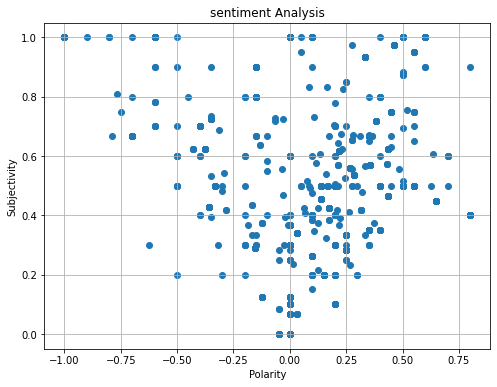

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Polarity'], df['Subjectivity'])
plt.title('sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.savefig('analysis.png')
files.download('analysis.png')

In [ ]:
#Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
print('The percentage of positive tweets is', round(ptweets['tweets'].shape[0]/ df['tweets'].shape[0] * 100, 2), '\n')

#Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
print('The percentage of negative tweets is', round(ntweets['tweets'].shape[0]/ df['tweets'].shape[0] * 100, 2),'\n')

#Get percentage of neutral tweets
nttweets = df[df.Analysis == 'Neutral']
print('The percentage of neutral tweets is', round(nttweets['tweets'].shape[0]/ df['tweets'].shape[0] * 100, 2),'\n')

The percentage of positive tweets is 32.27 

The percentage of negative tweets is 13.51 

The percentage of neutral tweets is 54.23 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

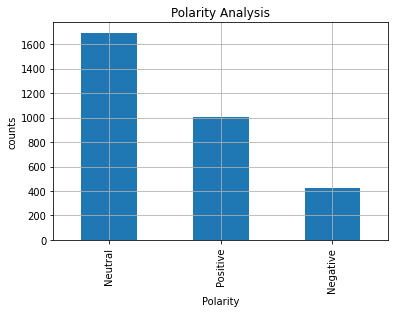

In [ ]:
df['Analysis'].value_counts().plot(kind = 'bar')
plt.title('Polarity Analysis')
plt.xlabel('Polarity')
plt.ylabel('counts')
plt.grid()
plt.savefig('polarity.png')
files.download('polarity.png')